![example](images/director_shot.jpeg)

# Analysis of Profitable Movies Released between 2010 and 2018
***
**Author:** Brent Smart
***

## Overview
***
A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

This project analyzes of profitable movies released between 2010 and 2018 in order to make recommendations to Microsoft on what types of movies to produce as it enters the movie production industry. The uses data from multiple public movie databases and graphs that show data for profitable movies. Given the top performance of Sci-Fi, Animation, and Adventure movies, focusing on these types of movies (or a combination) may be helpful to Microsoft. 



## Business Problem
***
This analysis aims to answer questions about the length, budget, genre types, and audiences of the movie industry for profitable films between 2010-2018. Focusing on the profitable movies may assist Microsft in initializing its entry into the movie production industy.

## Data Understanding
***
This analysis is of the data for top ten percent of movies, approximately. The top performing movies have the highest ratings and profits in the database between 2010 and 2018. The data was selected from online public movie databases IMDb, The-Numbers.com, and Box Office Mojo which all provide information central to answering the questions in this data analysis. Such categories include information on movie titles, genres, lengths, ratings, release year, studios, budgets, profits, and much more.  

***

Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions? 
* What do the data represent? Who is in the sample and what variables are included? 
* What is the target variable?
* What are the properties of the variables you intend to use?


In [76]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 

%matplotlib inline


In [169]:
# # Here you run your code to explore the data
df_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz').drop(['original_title'], axis=1)
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz').drop(['id'], axis=1)
df_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

# # Checking content of imported data
df_basics.info()
df_gross.info  
df_budgets.info()
df_ratings.info() 

# # Finding max and min of budget, years, and ratings 
df_budgets.production_budget.describe() #max: 99 million, min: 1 million
df_basics.start_year.describe() #max: 2115, min: 2010
df_gross.year.describe() #max: 2018, min: 2010
df_ratings.averagerating.describe() #max: 10.0, min:1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB
<class 'pandas.core.fr

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

## Data Preparation
***

The data analysis uses and combine some data from multiple databases. To account for different recording methods, punctuation was standardized in movie title, genre, gross and studio information. Since this analysis aims to answer questions about genre, revenue, and audience related variables were included and irrelevent variables were excluded.In order ensure the validity of the data this analysis only contains complete movie data. Entries with missing data were removed. A variable calculating profit data was created using the prodcution budget and world wide gross data. This variable was used to only include profitable movies.  

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers? 
* Why are these choices appropriate given the data and the business problem? 
***

In [170]:
# Here you run your code to clean the data
# # Cleaning punctuation from entries
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'
transtab = str.maketrans(dict.fromkeys(punct,''))

# Removed punction and turned all to lower case.
df_basics.primary_title = df_basics.primary_title.apply(lambda x: x.lower())
df_basics.primary_title = '|'.join(df_basics.primary_title.tolist()).translate(transtab).split('|')

df_gross.title = df_gross.title.apply(lambda x: x.lower())
df_gross.title = '|'.join(df_gross.title.tolist()).translate(transtab).split('|')
df_gross.studio = df_gross.studio.astype(str)
df_gross.studio = df_gross.studio.apply(lambda x: x.lower())
df_gross.studio = '|'.join(df_gross.studio.tolist()).translate(transtab).split('|')

df_budgets.movie = df_budgets.movie.apply(lambda x: x.lower())
df_budgets.movie = '|'.join(df_budgets.movie.tolist()).translate(transtab).split('|')

df_budgets.production_budget = df_budgets.production_budget.str.replace('$','')
df_budgets.production_budget = df_budgets.production_budget.str.replace(',','')

df_budgets.worldwide_gross = df_budgets.worldwide_gross.str.replace('$','')
df_budgets.worldwide_gross = df_budgets.worldwide_gross.str.replace(',','')

df_budgets.domestic_gross = df_budgets.domestic_gross.str.replace('$','')
df_budgets.domestic_gross = df_budgets.domestic_gross.str.replace(',','')


# Assigned appropriate astypes
df_budgets.release_date = pd.to_datetime(df_budgets['release_date'])
df_budgets.release_date = df_budgets.release_date.dt.year
df_budgets

# Divided and rounded gross information by million to aid readibility
df_budgets.production_budget = df_budgets.production_budget.astype(float)
df_budgets.production_budget = round(df_budgets.production_budget/1000000, 2)


df_budgets.worldwide_gross = df_budgets.worldwide_gross.astype(float)
df_budgets.worldwide_gross = round(df_budgets.worldwide_gross/1000000, 2)

df_budgets.domestic_gross = df_budgets.domestic_gross.astype(float)
df_budgets.domestic_gross = round(df_budgets.domestic_gross/1000000, 2)

# Created profit and foreign_gross variable using most complete data
df_budgets['total_profits_millions'] = round(df_budgets['worldwide_gross'] - df_budgets['production_budget'], 2)
df_budgets['foreign_gross_millions'] = round(df_budgets['worldwide_gross'] - df_budgets['domestic_gross'], 2)

df_budgets
# # Created main df using common items in each database to merge two at a time.
df_1 = pd.merge(df_basics, df_gross, left_on='primary_title', right_on='title', how='inner')
df_2 = pd.merge(df_1, df_budgets, left_on='primary_title', right_on='movie', how='inner')
df_3 = pd.merge(df_2, df_ratings, on='tconst', how='inner')


# # Cleaned database by filtering and by dropping records w/ duplicates & missing data.
# Used production_time_years to identify and remove duplicate rows.

df_3 = df_3.loc[(df_3['year'] >= 2010) 
                & (df_3['year'] <= 2018) 
                & (df_3['averagerating'] >= 5) 
                & (df_3['total_profits_millions'] >= 0)].sort_values(by=['total_profits_millions', 'averagerating'], ascending=False)
                 
df_3.drop_duplicates(subset=['movie', 'release_date'], keep='first', inplace=True, )
cols_to_drop = ['tconst', 'primary_title', 'title', 'domestic_gross_x', 'foreign_gross', 'title', 
                'year', 'start_year']
df_3.drop(cols_to_drop, axis=1, inplace=True)
df_3.reset_index(drop=True, inplace=True)
df_3 = df_3.dropna()
df = df_3.reindex(columns=['movie','studio','genres', 'runtime_minutes','production_budget','domestic_gross_y',
                           'foreign_gross_millions','worldwide_gross', 'total_profits_millions','numvotes', 'averagerating'])


# Spliting multi-genred movies into single-genred by splitting and making unique copies of each record and to main df.
s = (df.genres.str.split(',', expand=True).stack().to_frame(name='genres'))
s.index = s.index.droplevel(-1)
del df['genres']

df_split_genres = df.join(s)

# What is the average budget of movies released between 2010 and 2018 by genre?
df_genre_mean_prod_sort = df_split_genres.groupby(['genres']).mean().round(2).sort_values('production_budget').reset_index()
df_genre_budget = df_genre_mean_prod_sort[['genres','production_budget']]
df_genre_budget

# What is the average length of movies released between 2010 and 2018 by genre?
df_genre_mean_runt_sort = df_split_genres.groupby(['genres']).mean().round(2).sort_values('runtime_minutes').reset_index()
df_genre_avg_runtime = df_genre_mean_runt_sort[['genres','runtime_minutes']]
df_genre_avg_runtime

# Which movie genres are most common? 
df_genre_count = df_split_genres.groupby(['genres']).size().to_frame('count').sort_values(by='count').reset_index()
df_genre_count

# Which movie genres are most profitable?
df_genre_mean_prof_sort = df_split_genres.groupby(['genres']).mean().round(2).sort_values('total_profits_millions').reset_index()
df_genre_profits = df_genre_mean_prof_sort[['genres','total_profits_millions']]
df_genre_profits

# Which movie genres generated the most income in domestic and foreign markets?
#foreign
df_genre_mean_foreign_sort = df_split_genres.groupby(['genres']).mean().round(2).sort_values('foreign_gross_millions').reset_index()
df_genre_avg_foreign = df_genre_mean_foreign_sort[['genres','foreign_gross_millions']]
df_genre_avg_foreign

#domestic
df_genre_mean_domes_sort = df_split_genres.groupby(['genres']).mean().round(2).sort_values('domestic_gross_y').reset_index()
df_genre_avg_domestic = df_genre_mean_domes_sort[['genres','domestic_gross_y']]
df_genre_avg_domestic

df.head(20)


,movie,studio,runtime_minutes,production_budget,domestic_gross_y,foreign_gross_millions,worldwide_gross,total_profits_millions,numvotes,averagerating
0,avengers infinity war,bv,149.0,300.0,678.82,1369.31,2048.13,1748.13,670926,8.5
1,jurassic world,uni,124.0,215.0,652.27,996.58,1648.85,1433.85,539338,7.0
2,furious 7,uni,137.0,190.0,353.01,1165.71,1518.72,1328.72,335074,7.2
3,black panther,bv,134.0,200.0,700.06,648.20,1348.26,1148.26,516148,7.3
4,jurassic world fallen kingdom,uni,128.0,170.0,417.72,888.05,1305.77,1135.77,219125,6.2
5,frozen,bv,102.0,150.0,400.74,871.73,1272.47,1122.47,516998,7.5
6,minions,uni,91.0,74.0,336.05,824.29,1160.34,1086.34,193917,6.4
7,avengers age of ultron,bv,141.0,330.6,459.01,944.00,1403.01,1072.41,665594,7.3
8,incredibles 2,bv,118.0,200.0,608.58,633.94,1242.52,1042.52,203510,7.7
9,iron man 3,bv,130.0,200.0,408.99,806.40,1215.39,1015.39,692794,7.2


## Data Modeling
This analysis uses descriptive analysis, including descriptions of trends by genre and market. This provides a useful overview of profitable movies which Microsoft can use as it enters movie production. The data was modeled using bar graphs to get a visual representation of the movie data by genre. Each graph is seperate to show the  Describe and justify the process for analyzing or modeling the data.


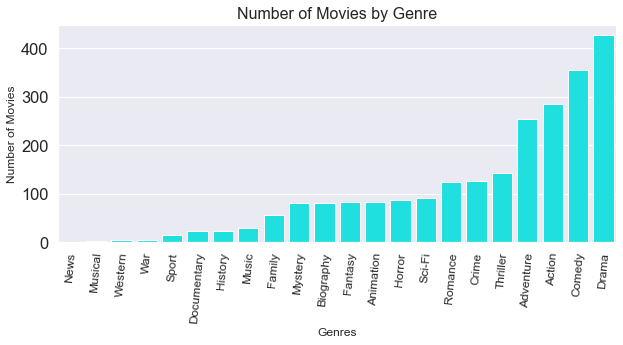

In [166]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5)

# Most common genres
fig, ax0 = plt.subplots(figsize = ( 10 , 4 )) 
sns.barplot(x="genres",
            y="count",
            data=df_genre_count,
            color = 'cyan')

ax0.set_xlabel( "Genres" , size = 12 ) 
ax0.set_ylabel( "Number of Movies" , size = 12 ) 
ax0.set_title( "Number of Movies by Genre" , size = 16 ) 
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=12, rotation=85)
plt.show();


There are 22 unique genre types and a total 923 unique movie titles. Of this data, the top three genres are Action, Comedy, and Drama. 

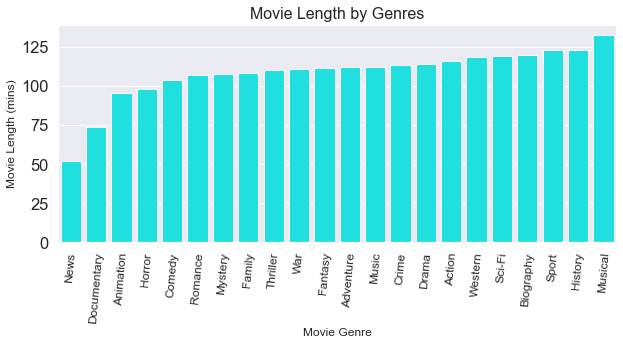

In [165]:
# Average length by genre

fig, ax1 = plt.subplots(figsize = ( 10 , 4 )) 
sns.barplot(x="genres",
            y="runtime_minutes",
            data=df_genre_avg_runtime,
            color = 'cyan')

ax1.set_xlabel( "Movie Genre" , size = 12 ) 
ax1.set_ylabel( "Movie Length (mins)" , size = 12 ) 
ax1.set_title( "Movie Length by Genres" , size = 16 ) 
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=12, rotation=85)
plt.show();


The average runtime for movies is about 108 minutes. About 75% of movies fit this category.

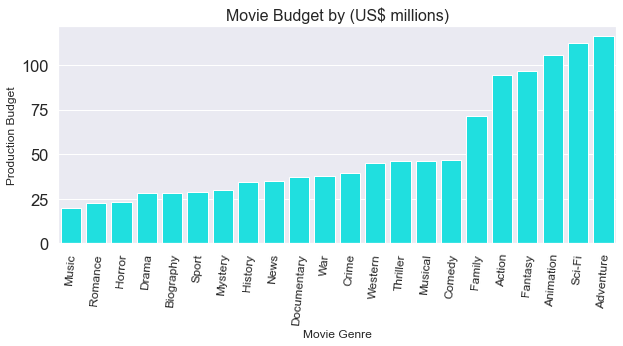

In [168]:
# # Average budget
fig, ax2 = plt.subplots(figsize = ( 10 , 4 )) 
sns.barplot(x="genres",
            y="production_budget",
            data=df_genre_budget,
            color = 'cyan')

ax2.set_xlabel( "Movie Genre" , size = 12 ) 
ax2.set_ylabel( "Production Budget" , size = 12 ) 
ax2.set_title( "Movie Budget by (US$ millions)" , size = 16 ) 
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12, rotation=85)

plt.show();



The average budget for profitable movies is 52.07 million (US). The top three most expensive genres are Animation, Sci-Fi, and Adventure.

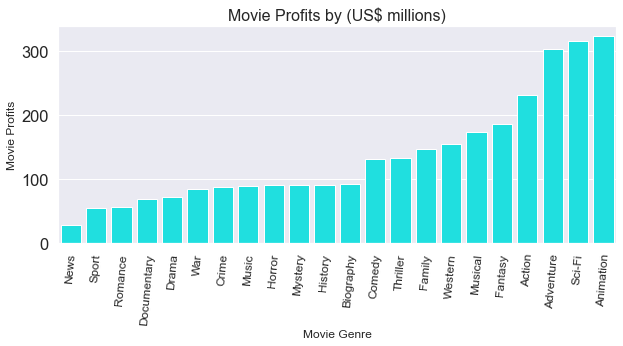

In [167]:
# # Profits
fig, ax3 = plt.subplots(figsize = ( 10 , 4 )) 
sns.barplot(x="genres",
            y="total_profits_millions",
            data=df_genre_profits,
            color = 'cyan')

ax3.set_xlabel( "Movie Genre" , size = 12 ) 
ax3.set_ylabel( "Movie Profits" , size = 12 ) 
ax3.set_title( "Movie Profits by (US$ millions)" , size = 16 ) 
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

The average profit for profitable movies in this data set it 136.36 million (US). The top three genres are Adventure, Sci-Fi, and Animation.

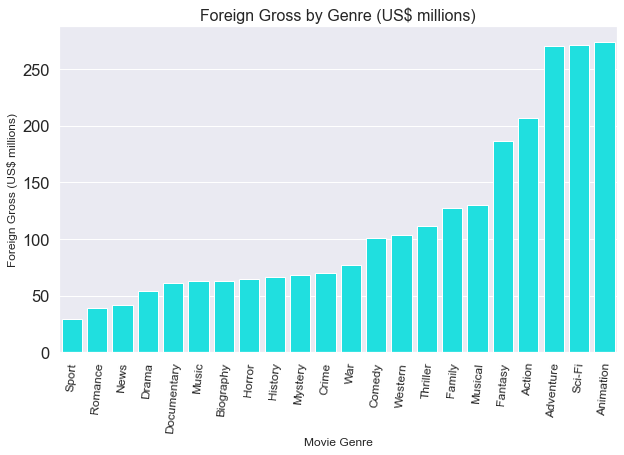

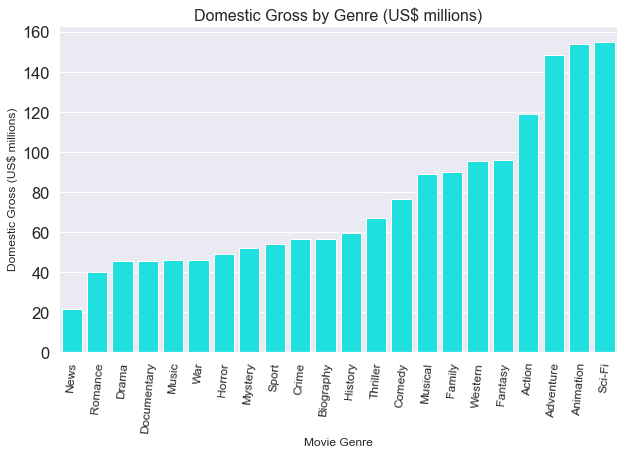

In [162]:
fig, ax4 = plt.subplots(figsize = ( 10 , 6 )) 
sns.barplot(x="genres", 
            y="foreign_gross_millions",
            data = df_genre_avg_foreign,
            color = 'cyan')

ax4.set_xlabel( "Movie Genre" , size = 12 ) 
ax4.set_ylabel( "Foreign Gross (US$ millions)" , size = 12 ) 
ax4.set_title( "Foreign Gross by Genre (US$ millions)" , size = 16 ) 
ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

fig, ax4 = plt.subplots(figsize = ( 10 , 6 )) 
sns.barplot(x="genres", 
            y="domestic_gross_y",
            data = df_genre_avg_domestic, 
            color = 'cyan')
ax4.set_xlabel( "Movie Genre" , size = 12 ) 
ax4.set_ylabel( "Domestic Gross (US$ millions)" , size = 12 ) 
ax4.set_title( "Domestic Gross by Genre (US$ millions)" , size = 16 ) 
ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

The average foreign gross for profitable movies in this data set it 112.78 million (US). The average domestic gross for profitable movies in this data set it 75.65 million (US). The top three genres are Adventure, Animation, and Sci-Fi, with Sci-Fi slightly out performing Animation in domestic markets.

## Evaluation
This data analysis only included profitable movies from 2010-2018. I am confident that this model will helpful to Microsoft as it begins planning its entry into movie production.


## Conclusions
The analysis leads to four recommendations for Microsoft as it prepares to produce movies: 
 
1. **Produce movies that are a combination of Sci-Fi, Animation, and or Adventure.** Sci-fi, Animation, and Adventure movies outperformed the other genres in terms of profitability and generated the most income domestically and internationally. Few movies in the original dataset were of one genre. Most were a combination of 1-2 generes. 
2. **Allocate a movie production budget of about one million US.** Sci-fi, Animation, and Adventure were the three most about that much to produce and they were also the three most profitable genres. 
3. **Produce movies that are typical in length (~108 mins).** Most movies in the top performing genres are all of that length.
4. **Produce movies that can be marketed domestically and internationally.** Sci-fi, Animation, and Adventure were the three most successful genres both locally and internationally. They also were the three most profitable genres.



Further analysis could yield different insights:
1. **Models that compare/constrast expected and actual outcome.** This could help with predicting overall profits.
2. **Models that investigate studios and gleen best practices.** This model could help with idenitfying best practices and potential partners/competitors. 
